<a href="https://colab.research.google.com/github/umamah333/Image-Segmentation-using-Transfer-learning/blob/main/transfer%20learning%20using%20MObileVnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset (1).zip"

Archive:  /content/drive/MyDrive/RM_Segmentation_Assignment_dataset (1).zip
  inflating: test-30/000000001751.jpg  
  inflating: test-30/000000001380.jpg  
  inflating: test-30/000000001643.jpg  
  inflating: test-30/000000001583.jpg  
  inflating: test-30/000000001685.jpg  
  inflating: test-30/000000001482.jpg  
  inflating: test-30/000000001494.jpg  
  inflating: test-30/000000001551.jpg  
  inflating: test-30/000000001654.jpg  
  inflating: test-30/000000001594.jpg  
  inflating: test-30/000000001411.jpg  
  inflating: test-30/000000001459.jpg  
  inflating: test-30/000000001410.jpg  
  inflating: test-30/000000001717.jpg  
  inflating: test-30/000000001730.jpg  
  inflating: validation-300/labels.json  
  inflating: test-30/000000001385.jpg  
  inflating: train-300/labels.json   
  inflating: test-30/000000001492.jpg  
  inflating: test-30/000000001600.jpg  
  inflating: test-30/000000001657.jpg  
  inflating: test-30/000000001671.jpg  
  inflating: test-30/000000001418.jpg  
  in

In [ ]:
import os
import json

# Path to the "train" folder
train_folder_path = '/content/train-300'  # Update with your actual path

# Path to the JSON file containing labels
labels_json_path = os.path.join(train_folder_path, 'labels.json')  # Update with your actual file name

# Check if the JSON file exists
if os.path.exists(labels_json_path):
    # Read the JSON file
    with open(labels_json_path, 'r') as json_file:
        labels_data = json.load(json_file)

    # Extract class labels
    classes = list(labels_data.keys())

    # Count the number of classes
    num_classes = len(classes)

    # Print the results
    print(f"Number of classes in the 'train' folder: {num_classes}")
    print("Classes:", classes)
else:
    print(f"Error: JSON file '{labels_json_path}' not found.")


Number of classes in the 'train' folder: 5
Classes: ['info', 'licenses', 'categories', 'images', 'annotations']


Info Section:
{'year': 2017, 'version': '1.0', 'contributor': 'COCO Consortium', 'url': 'http://cocodataset.org', 'date_created': '2017/09/01'}

Licenses Section:
[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}, {'url': 'http://flickr.com/commons/usage/', 'id': 7, 'name': 'No known copyright restrictions'}, {'url': 'http://www.usa.gov/copyright.shtml', 'id': 8, 'name

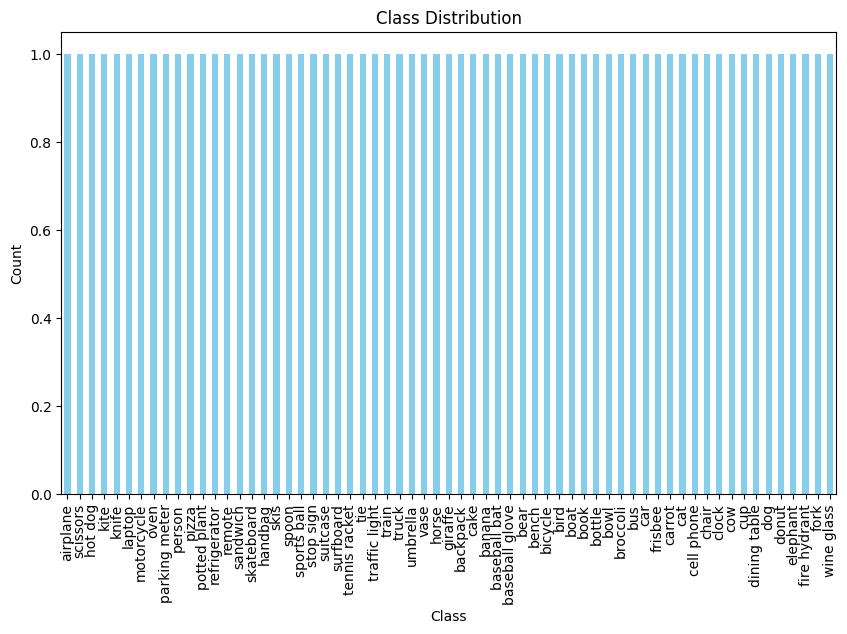

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
json_file_path = '/content/train-300/labels.json'  # Update with your actual path
with open(json_file_path, 'r') as file:
    data = json.load(file)

# EDA on 'info' section
info_data = data.get('info', {})
print('Info Section:')
print(info_data)

# EDA on 'licenses' section
licenses_data = data.get('licenses', [])
print('\nLicenses Section:')
print(licenses_data)

# EDA on 'categories' section
categories_data = data.get('categories', [])
num_classes = len(categories_data)
print(f'\nNumber of classes: {num_classes}')
print('Classes:')
print(categories_data)

# EDA on 'images' section
images_data = data.get('images', [])
num_images = len(images_data)
print(f'\nNumber of images: {num_images}')

# EDA on 'annotations' section
annotations_data = data.get('annotations', [])
num_annotations = len(annotations_data)
print(f'\nNumber of annotations: {num_annotations}')

# Create a DataFrame for 'categories' for further analysis
categories_df = pd.DataFrame(categories_data)

# Visualize class distribution
plt.figure(figsize=(10, 6))
categories_df['name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Info Section:
{'year': 2017, 'version': '1.0', 'contributor': 'COCO Consortium', 'url': 'http://cocodataset.org', 'date_created': '2017/09/01'}

Licenses Section:
[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}, {'url': 'http://flickr.com/commons/usage/', 'id': 7, 'name': 'No known copyright restrictions'}, {'url': 'http://www.usa.gov/copyright.shtml', 'id': 8, 'name

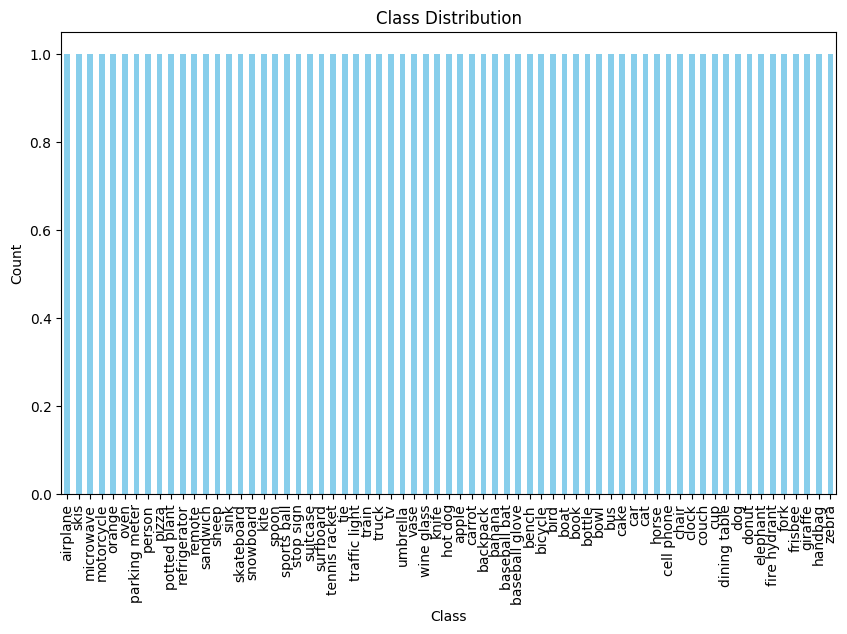

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
json_file_path = '/content/validation-300/labels.json'  # Update with your actual path
with open(json_file_path, 'r') as file:
    data = json.load(file)

# EDA on 'info' section
info_data = data.get('info', {})
print('Info Section:')
print(info_data)

# EDA on 'licenses' section
licenses_data = data.get('licenses', [])
print('\nLicenses Section:')
print(licenses_data)

# EDA on 'categories' section
categories_data = data.get('categories', [])
num_classes = len(categories_data)
print(f'\nNumber of classes: {num_classes}')
print('Classes:')
print(categories_data)

# EDA on 'images' section
images_data = data.get('images', [])
num_images = len(images_data)
print(f'\nNumber of images: {num_images}')

# EDA on 'annotations' section
annotations_data = data.get('annotations', [])
num_annotations = len(annotations_data)
print(f'\nNumber of annotations: {num_annotations}')

# Create a DataFrame for 'categories' for further analysis
categories_df = pd.DataFrame(categories_data)

# Visualize class distribution
plt.figure(figsize=(10, 6))
categories_df['name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
import json

# Path to the original JSON file containing labels
original_labels_json_path = '/content/train-300/labels.json'  # Update with your actual path

# Path to the new JSON file with filtered classes
new_labels_json_path = '/content/label_new_train.json'  # Update with your desired path

# Classes to keep
target_classes = ['person', 'car', 'dog', 'cake']

# Read the original JSON file
with open(original_labels_json_path, 'r') as original_file:
    original_data = json.load(original_file)

# Filter relevant information for the target classes
filtered_categories = [category for category in original_data.get('categories', []) if category['name'] in target_classes]
filtered_annotations = [annotation for annotation in original_data.get('annotations', []) if annotation['category_id'] in [cat['id'] for cat in filtered_categories]]

# Create a new JSON structure with the filtered information
new_labels_data = {
    'info': original_data.get('info', {}),
    'licenses': original_data.get('licenses', []),
    'categories': filtered_categories,
    'images': original_data.get('images', []),
    'annotations': filtered_annotations
}

# Write the new JSON data to the new file
with open(new_labels_json_path, 'w') as new_file:
    json.dump(new_labels_data, new_file, indent=2)

print(f"New JSON file with filtered classes created at: {new_labels_json_path}")


New JSON file with filtered classes created at: /content/label_new_train.json


Info Section:
{'year': 2017, 'version': '1.0', 'contributor': 'COCO Consortium', 'url': 'http://cocodataset.org', 'date_created': '2017/09/01'}

Licenses Section:
[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}, {'url': 'http://flickr.com/commons/usage/', 'id': 7, 'name': 'No known copyright restrictions'}, {'url': 'http://www.usa.gov/copyright.shtml', 'id': 8, 'name

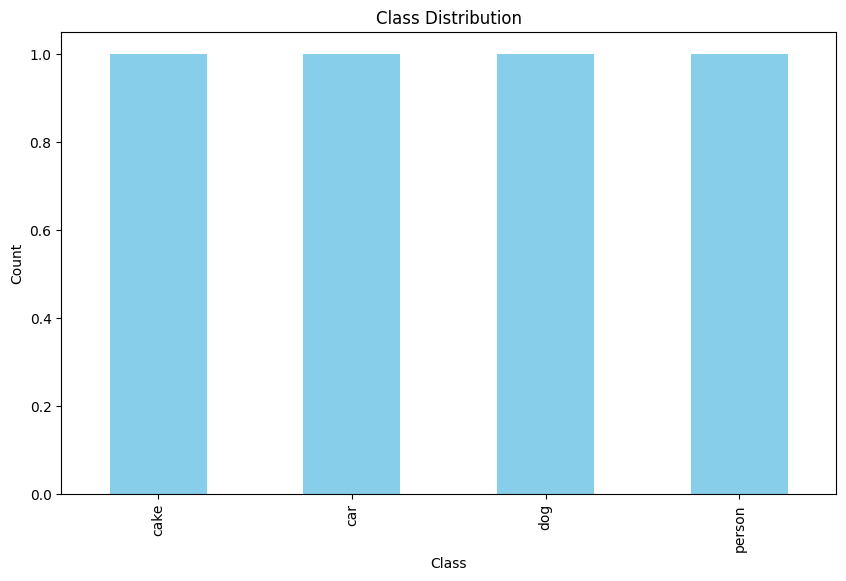

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
json_file_path = '/content/label_new_train.json'  # Update with your actual path
with open(json_file_path, 'r') as file:
    data = json.load(file)

# EDA on 'info' section
info_data = data.get('info', {})
print('Info Section:')
print(info_data)

# EDA on 'licenses' section
licenses_data = data.get('licenses', [])
print('\nLicenses Section:')
print(licenses_data)

# EDA on 'categories' section
categories_data = data.get('categories', [])
num_classes = len(categories_data)
print(f'\nNumber of classes: {num_classes}')
print('Classes:')
print(categories_data)

# EDA on 'images' section
images_data = data.get('images', [])
num_images = len(images_data)
print(f'\nNumber of images: {num_images}')

# EDA on 'annotations' section
annotations_data = data.get('annotations', [])
num_annotations = len(annotations_data)
print(f'\nNumber of annotations: {num_annotations}')

# Create a DataFrame for 'categories' for further analysis
categories_df = pd.DataFrame(categories_data)

# Visualize class distribution
plt.figure(figsize=(10, 6))
categories_df['name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
import json

# Path to the original JSON file containing labels
original_labels_json_path = '/content/validation-300/labels.json'  # Update with your actual path

# Path to the new JSON file with filtered classes
new_labels_json_path = '/content/label_new_validation.json'  # Update with your desired path

# Classes to keep
target_classes = ['person', 'car', 'dog', 'cake']

# Read the original JSON file
with open(original_labels_json_path, 'r') as original_file:
    original_data = json.load(original_file)

# Filter relevant information for the target classes
filtered_categories = [category for category in original_data.get('categories', []) if category['name'] in target_classes]
filtered_annotations = [annotation for annotation in original_data.get('annotations', []) if annotation['category_id'] in [cat['id'] for cat in filtered_categories]]

# Create a new JSON structure with the filtered information
new_labels_data = {
    'info': original_data.get('info', {}),
    'licenses': original_data.get('licenses', []),
    'categories': filtered_categories,
    'images': original_data.get('images', []),
    'annotations': filtered_annotations
}

# Write the new JSON data to the new file
with open(new_labels_json_path, 'w') as new_file:
    json.dump(new_labels_data, new_file, indent=2)

print(f"New JSON file with filtered classes created at: {new_labels_json_path}")


New JSON file with filtered classes created at: /content/label_new_validation.json


Info Section:
{'year': 2017, 'version': '1.0', 'contributor': 'COCO Consortium', 'url': 'http://cocodataset.org', 'date_created': '2017/09/01'}

Licenses Section:
[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}, {'url': 'http://flickr.com/commons/usage/', 'id': 7, 'name': 'No known copyright restrictions'}, {'url': 'http://www.usa.gov/copyright.shtml', 'id': 8, 'name

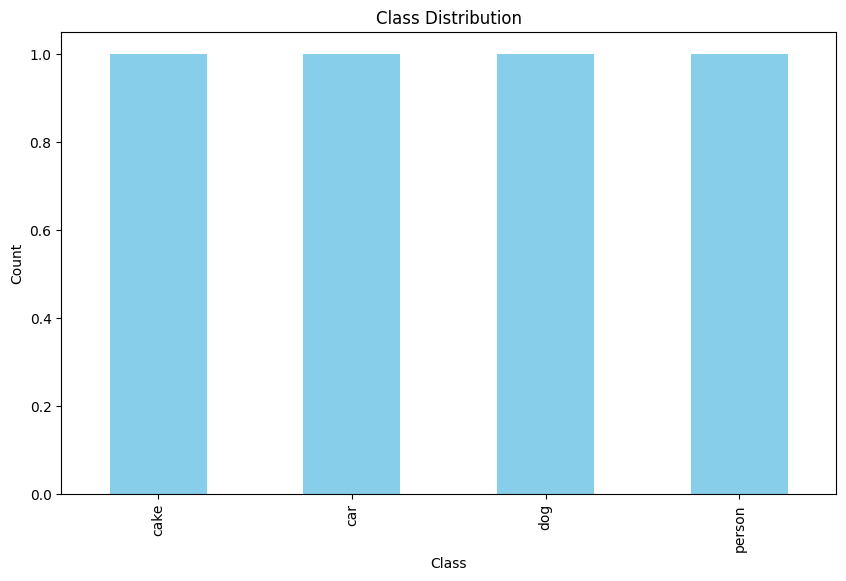

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
json_file_path = '/content/label_new_validation.json'  # Update with your actual path
with open(json_file_path, 'r') as file:
    data = json.load(file)

# EDA on 'info' section
info_data = data.get('info', {})
print('Info Section:')
print(info_data)

# EDA on 'licenses' section
licenses_data = data.get('licenses', [])
print('\nLicenses Section:')
print(licenses_data)

# EDA on 'categories' section
categories_data = data.get('categories', [])
num_classes = len(categories_data)
print(f'\nNumber of classes: {num_classes}')
print('Classes:')
print(categories_data)

# EDA on 'images' section
images_data = data.get('images', [])
num_images = len(images_data)
print(f'\nNumber of images: {num_images}')

# EDA on 'annotations' section
annotations_data = data.get('annotations', [])
num_annotations = len(annotations_data)
print(f'\nNumber of annotations: {num_annotations}')

# Create a DataFrame for 'categories' for further analysis
categories_df = pd.DataFrame(categories_data)

# Visualize class distribution
plt.figure(figsize=(10, 6))
categories_df['name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
import json

# Load the labels from the JSON file
with open('/content/label_new_validation.json', 'r') as json_file:
    data = json.load(json_file)

# Access segmentation information for each annotation
for annotation in data['annotations']:
    segmentation = annotation.get('segmentation', [])
    print(f"Segmentation for annotation {annotation['id']}: {segmentation}")


Segmentation for annotation 3: [[133.0, 274.5, 127.5, 274.0, 130.0, 266.5, 134.5, 268.0, 133.0, 274.5], [140.0, 274.5, 134.5, 274.0, 137.0, 266.5, 140.5, 269.0, 140.0, 274.5]]
Segmentation for annotation 5: [[48.0, 471.5, 0.5, 471.0, 3.0, 372.5, 21.0, 374.5, 31.0, 368.5, 84.0, 390.5, 118.5, 443.0, 117.0, 469.5, 48.0, 471.5]]
Segmentation for annotation 6: [[540.0, 442.5, 532.0, 436.5, 510.0, 436.5, 507.0, 441.5, 501.5, 441.0, 501.5, 407.0, 506.0, 397.5, 516.0, 396.5, 543.5, 402.0, 543.5, 412.0, 550.5, 413.0, 545.5, 415.0, 544.5, 437.0, 540.0, 442.5]]
Segmentation for annotation 7: [[231.0, 426.5, 226.0, 423.5, 200.0, 425.5, 199.5, 411.0, 209.0, 400.5, 226.0, 400.5, 225.5, 415.0, 232.5, 417.0, 231.0, 426.5]]
Segmentation for annotation 8: [[114.0, 434.5, 109.0, 434.5, 106.5, 429.0, 105.5, 394.0, 118.0, 374.5, 171.0, 379.5, 174.5, 383.0, 184.5, 401.0, 184.0, 431.5, 119.0, 429.5, 114.0, 434.5]]
Segmentation for annotation 10: [[481.0, 453.5, 473.0, 447.5, 450.0, 443.5, 443.0, 449.5, 432.0

In [ ]:
import os
import json
from PIL import Image, ImageDraw
from pathlib import Path

# Load the labels from the JSON file
with open('/content/label_new_validation.json', 'r') as json_file:
    data = json.load(json_file)

# Specify the directory containing validation images
image_dir = '/content/validation-300/data'

# Create directories for each class
for category in data['categories']:
    class_name = category['name']
    class_dir = os.path.join('/content/validation_images_extracted', class_name)
    os.makedirs(class_dir, exist_ok=True)

# Extract and save image segments
for annotation in data['annotations']:
    image_id = annotation['image_id']
    category_id = annotation['category_id']

    # Find the corresponding file name for the image_id
    image_info = next(image_info for image_info in data['images'] if image_info['id'] == image_id)
    filename = image_info['file_name']

    # Get the class name from category_id
    class_info = next(category for category in data['categories'] if category['id'] == category_id)
    class_name = class_info['name']

    # Get the segmentation information
    segmentations = annotation.get('segmentation', [])

    # Open the original image
    image_path = os.path.join(image_dir, filename)
    original_image = Image.open(image_path)

    # Create a directory for the current image if it doesn't exist
    image_output_dir = os.path.join('/content/validation_images_extracted', class_name, Path(filename).stem)
    os.makedirs(image_output_dir, exist_ok=True)

    # Iterate over each set of coordinates in the segmentation list
    for segmentation_coords in segmentations:
        try:
            # Convert floating-point coordinates to integers
            segmentation_coords = [round(float(coord)) for coord in segmentation_coords]
        except ValueError:
            print(f"Skipping invalid segmentation coordinates: {segmentation_coords}")
            continue

        # Create a mask for the segment
        mask = Image.new('L', original_image.size, 0)
        ImageDraw.Draw(mask).polygon(segmentation_coords, outline=1, fill=1)

        # Crop the segment from the original image
        segment = Image.new('RGB', original_image.size)
        segment.paste(original_image, mask=mask)

        # Save the segment
        segment_filename = f"{Path(filename).stem}_segment.jpg"
        segment_path = os.path.join(image_output_dir, segment_filename)
        segment.save(segment_path)

print("Validation image segments have been successfully extracted and organized into class directories.")


Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid seg

In [ ]:
import os
import json
from PIL import Image, ImageDraw
from pathlib import Path

# Load the labels from the JSON file
with open('/content/label_new_train.json', 'r') as json_file:
    data = json.load(json_file)

# Specify the directory containing validation images
image_dir = '/content/train-300/data'

# Create directories for each class
for category in data['categories']:
    class_name = category['name']
    class_dir = os.path.join('/content/train_images_extracted', class_name)
    os.makedirs(class_dir, exist_ok=True)

# Extract and save image segments
for annotation in data['annotations']:
    image_id = annotation['image_id']
    category_id = annotation['category_id']

    # Find the corresponding file name for the image_id
    image_info = next(image_info for image_info in data['images'] if image_info['id'] == image_id)
    filename = image_info['file_name']

    # Get the class name from category_id
    class_info = next(category for category in data['categories'] if category['id'] == category_id)
    class_name = class_info['name']

    # Get the segmentation information
    segmentations = annotation.get('segmentation', [])

    # Open the original image
    image_path = os.path.join(image_dir, filename)
    original_image = Image.open(image_path)

    # Create a directory for the current image if it doesn't exist
    image_output_dir = os.path.join('/content/train_images_extracted', class_name, Path(filename).stem)
    os.makedirs(image_output_dir, exist_ok=True)

    # Iterate over each set of coordinates in the segmentation list
    for segmentation_coords in segmentations:
        try:
            # Convert floating-point coordinates to integers
            segmentation_coords = [round(float(coord)) for coord in segmentation_coords]
        except ValueError:
            print(f"Skipping invalid segmentation coordinates: {segmentation_coords}")
            continue

        # Create a mask for the segment
        mask = Image.new('L', original_image.size, 0)
        ImageDraw.Draw(mask).polygon(segmentation_coords, outline=1, fill=1)

        # Crop the segment from the original image
        segment = Image.new('RGB', original_image.size)
        segment.paste(original_image, mask=mask)

        # Save the segment
        segment_filename = f"{Path(filename).stem}_segment.jpg"
        segment_path = os.path.join(image_output_dir, segment_filename)
        segment.save(segment_path)

print("Validation image segments have been successfully extracted and organized into class directories.")


Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid segmentation coordinates: counts
Skipping invalid segmentation coordinates: size
Skipping invalid seg

In [ ]:
# Define Dice coefficient metric
def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))


In [ ]:
# Compile the model with custom metric (Dice coefficient)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', dice_coefficient])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/train_images_extracted', target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('/content/validation_images_extracted', target_size=(224, 224), batch_size=32, class_mode='categorical')

history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 566 images belonging to 4 classes.
Found 474 images belonging to 4 classes.
Epoch 1/10
18/18 [==============================] - 128s 7s/step - loss: 0.7040 - accuracy: 0.5989 - dice_coefficient: 0.5549 - val_loss: 1.9486 - val_accuracy: 0.4747 - val_dice_coefficient: 0.4871
Epoch 2/10
18/18 [==============================] - 124s 7s/step - loss: 0.7040 - accuracy: 0.6078 - dice_coefficient: 0.5757 - val_loss: 2.0492 - val_accuracy: 0.4979 - val_dice_coefficient: 0.5000
Epoch 3/10
18/18 [==============================] - 116s 6s/step - loss: 0.7075 - accuracy: 0.6184 - dice_coefficient: 0.5659 - val_loss: 1.5634 - val_accuracy: 0.4979 - val_dice_coefficient: 0.5018
Epoch 4/10
18/18 [==============================] - 124s 7s/step - loss: 0.7030 - accuracy: 0.5901 - dice_coefficient: 0.5460 - val_loss: 1.7485 - val_accuracy: 0.4747 - val_dice_coefficient: 0.4875
Epoch 5/10
18/18 [==============================] - 123s 7s/step - loss: 0.7092 - accuracy: 0.5689 - dice_coefficient: 0.5

In [ ]:
import plotly.express as px

# Plot training and validation loss
fig = px.line()
fig.add_scatter(x=list(range(1, len(history.history['loss'])+1)), y=history.history['loss'], mode='lines', name='Training Loss')
fig.add_scatter(x=list(range(1, len(history.history['val_loss'])+1)), y=history.history['val_loss'], mode='lines', name='Validation Loss')
fig.update_layout(title='Training and Validation Loss',
                   xaxis_title='Epochs',
                   yaxis_title='Loss',
                   width=800)  # Adjust the width here
fig.show()

# Plot training and validation accuracy
fig = px.line()
fig.add_scatter(x=list(range(1, len(history.history['accuracy'])+1)), y=history.history['accuracy'], mode='lines', name='Training Accuracy')
fig.add_scatter(x=list(range(1, len(history.history['val_accuracy'])+1)), y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy')
fig.update_layout(title='Training and Validation Accuracy',
                   xaxis_title='Epochs',
                   yaxis_title='Accuracy',
                   width=800)  # Adjust the width here
fig.show()

# Plot training and validation Dice coefficient
fig = px.line()
fig.add_scatter(x=list(range(1, len(history.history['dice_coefficient'])+1)), y=history.history['dice_coefficient'], mode='lines', name='Training Dice Coefficient')
fig.add_scatter(x=list(range(1, len(history.history['val_dice_coefficient'])+1)), y=history.history['val_dice_coefficient'], mode='lines', name='Validation Dice Coefficient')
fig.update_layout(title='Training and Validation Dice Coefficient',
                   xaxis_title='Epochs',
                   yaxis_title='Dice Coefficient',
                   width=800)  # Adjust the width here
fig.show()

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
image_path = "/content/test-30/000000001371.jpg"
image = load_img(image_path, target_size = (224, 224))
image = img_to_array(image)
image = np.expand_dims(image , axis= 0)
image /=255.0
model = load_model('model.h5')
prediction = model.predict(image)

1/1 [==============================] - 1s 1s/step


In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

1/1 [==============================] - 0s 129ms/step


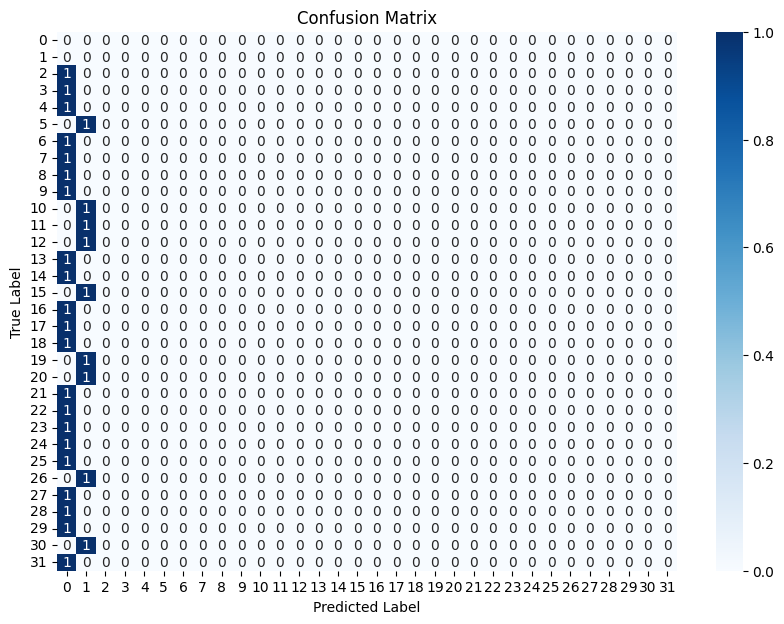

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import os

# Directory containing the test images
test_dir = "/content/test-30"

# List to store predictions and corresponding ground truth labels
predictions = []
ground_truth_labels = []

# Iterate through the image files in the directory
for filename in os.listdir(test_dir):
    # Load the image
    image_path = os.path.join(test_dir, filename)
    image = load_img(image_path, target_size=(224, 224))

    # Convert image to array and preprocess
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array /= 255.0

    # Make predictions
    prediction = model.predict(image_array)
    predictions.append(np.argmax(prediction))

    # Get the ground truth label from the filename
    ground_truth_label = int(filename.split('.')[0])  # Assuming filenames are numbers
    ground_truth_labels.append(ground_truth_label)

# Determine the number of classes
num_classes = len(set(ground_truth_labels + predictions))

# Create confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, predictions)

# Convert confusion matrix to DataFrame for visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(num_classes), columns=range(num_classes))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#  list of class names
class_names = ['cake', 'car', 'dog', 'person']


1/1 [==============================] - 0s 55ms/step


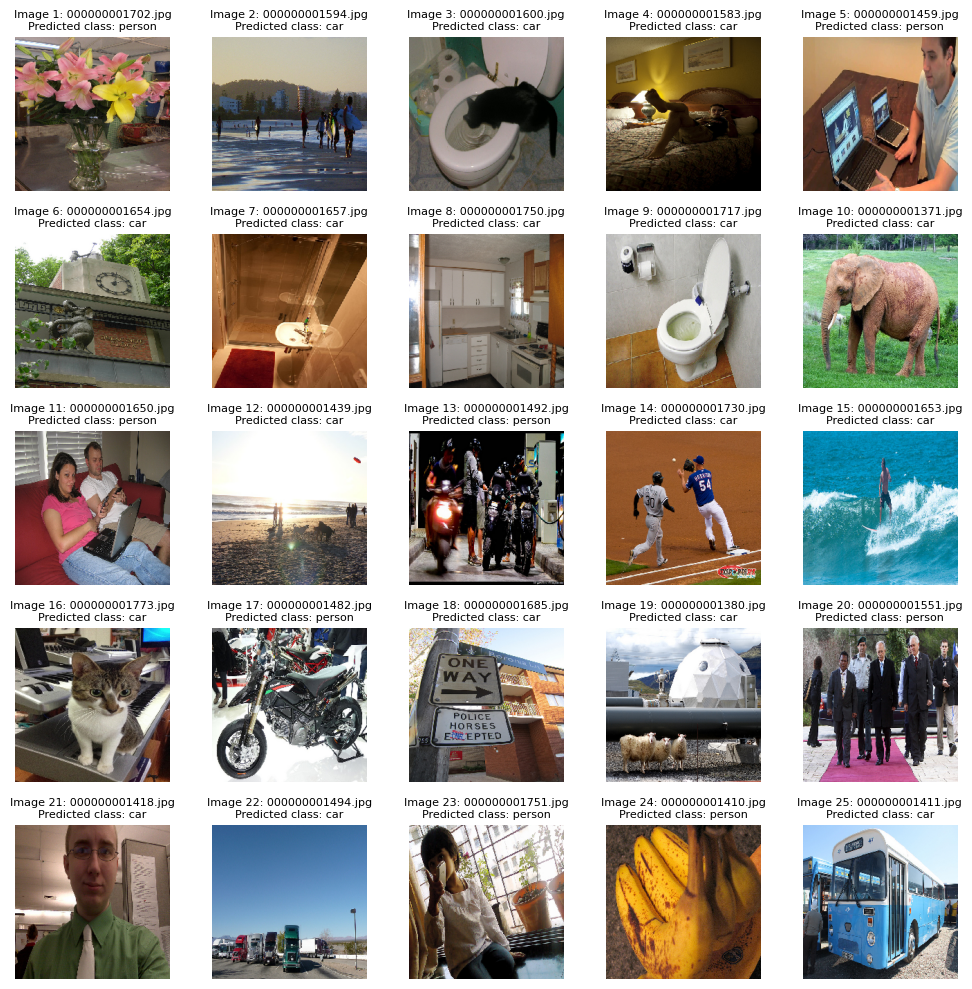

In [ ]:
# Directory containing the test images
test_dir = "/content/test-30"

# List to store predictions for all images
all_predictions = []

# Iterate through the image files in the directory
for filename in os.listdir(test_dir):
    # Load the image
    image_path = os.path.join(test_dir, filename)
    image = load_img(image_path, target_size=(224, 224))

    # Convert image to array and preprocess
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array /= 255.0

    # Make predictions
    prediction = model.predict(image_array)

    # Decode predictions
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Store the prediction for this image
    all_predictions.append((filename, predicted_class, image))

# Display original images with predicted class labels
plt.figure(figsize=(10, 10))
num_images_to_display = min(len(all_predictions), 25)  # Display maximum 25 images
for i, (filename, prediction, image) in enumerate(all_predictions[:num_images_to_display], 1):
    plt.subplot(5, 5, i)
    plt.imshow(image)
    plt.title(f"Image {i}: {filename}\nPredicted class: {prediction}", fontsize=8)  # Adjust fontsize as needed
    plt.axis('off')

# Adjust layout to add more space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.tight_layout()
plt.show()